# üß™ TP ‚Äì Analyse des performances d‚Äô√©tudiants

üéØ **Objectif :** Pr√©parer ce dataset pour un prochain cours qui pr√©dira la note finale d‚Äôun √©tudiant.

### Jeu de donn√©es : StudentsPerformance.csv
### R√©ponder aux questions dans la cellule suivant la question
### Modules autoris√©s : pandas, mathplotlib, numpy, seaborn, scikit-learn

## üìã Questions

### üîπ 0. charger le jeu de donn√©es et ajout de colonne average_score

a. Charger le jeu de donn√©es et puis ajouter une colonne 'average_score' (moyenne des trois notes "math score","reading score","writing score" dans le jeu de donn√©es

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df.to_csv('StudentsPerformanceWithMean.csv', index=False)


### üîπ 1. Exploration de base

a. Charger le jeu de donn√©es et Afficher les 10 premi√®res lignes du dataset

In [2]:
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   
5                    none          71             83             78   
6               completed          88             95             92   
7                    none          40             43             39   
8               completed          64             64             67   
9                    none          38             60             50   

   average_score  
0      72.666667  
1      82.333333  
2      92.666667  
3      49.333333  
4      76.333333  
5      77.333333  
6      91.666667  
7      40.666667  
8      65.000000  
9      49.333333

b. Combien d‚Äô√©tudiants ont particip√© √† l‚Äô√©tude ?

In [3]:
print("Nombre de ligne",df.shape[0])

Nombre de ligne 1000


c. Existe-t-il des doublons (√©tudiants) ?

In [4]:
# V√©rifie les doublons en consid√©rant toutes les colonnes
print("Nombre de doublons (toutes colonnes):", df.duplicated().sum())

# Affiche les lignes dupliqu√©es avec toutes leurs colonnes
duplicated_rows = df[df.duplicated(keep='first')]
print("\nLignes dupliqu√©es compl√®tes:")
print(duplicated_rows)

Nombre de doublons (toutes colonnes): 0

Lignes dupliqu√©es compl√®tes:
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, average_score]
Index: []


d. Donner les statistiques de base des scores (max, min, moyenne, mediane)

In [5]:
# S√©lectionner uniquement les colonnes des scores
scores_columns = ['math score', 'reading score', 'writing score']
scores_stats = df[scores_columns].describe()

specific_stats = df[scores_columns].agg(['min', 'max', 'mean', 'median'])
print("\nStatistiques demand√©es :")
print(specific_stats)


Statistiques demand√©es :
        math score  reading score  writing score
min          0.000         17.000         10.000
max        100.000        100.000        100.000
mean        66.089         69.169         68.054
median      66.000         70.000         69.000


### üîπ 2. D√©tection de valeurs manquantes ou incoh√©rentes

a. Nombre de valeurs manquantes par cellule?

In [6]:
missing_values = df.isnull().sum()
print("Nombre de valeurs manquantes :\n", missing_values)

Nombre de valeurs manquantes :
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


b. Combien d'√©tudiants ont un score moyen < 40 ?

In [7]:
nb_low_scores = len(df[df['average_score'] < 40])
print("Nombre d'√©tudiant ayant un score inf√©rieur √† 40 :", nb_low_scores)

Nombre d'√©tudiant ayant un score inf√©rieur √† 40 : 30


c. Valeurs aberrantes pour le score moyen ? (utiliser visualisation et la M√©thode de l‚Äô√©cart interquartile [√† lire])

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de l'IQR pour le score moyen
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

# D√©finir les limites pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = df[(df['average_score'] < lower_bound) | (df['average_score'] > upper_bound)]

# Afficher les statistiques
print(f"Limite inf√©rieure : {lower_bound:.2f}")
print(f"Limite sup√©rieure : {upper_bound:.2f}")
print(f"\nNombre de valeurs aberrantes : {len(outliers)}")

plt.figure(figsize=(10, 6))

# Cr√©er un nuage de points avec les donn√©es normales
normal_data = df[(df['average_score'] >= lower_bound) & (df['average_score'] <= upper_bound)]
plt.scatter(x=normal_data.index, y=normal_data['average_score'], 
            color='blue', alpha=0.7, label='Donn√©es normales')

# Mettre en √©vidence les valeurs aberrantes
if not outliers.empty:
    plt.scatter(x=outliers.index, y=outliers['average_score'], 
                color='red', alpha=0.7, label='Valeurs aberrantes')

# Ajouter les lignes de seuil
plt.axhline(y=lower_bound, color='r', linestyle='--', alpha=0.7, 
            label=f'Limite basse: {lower_bound:.1f}')
plt.axhline(y=upper_bound, color='r', linestyle='--', alpha=0.7, 
            label=f'Limite haute: {upper_bound:.1f}')

# Personnalisation du graphique
plt.title('Nuage de points des scores moyens avec valeurs aberrantes', pad=15)
plt.xlabel('Index des √©tudiants')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()

# Afficher les statistiques dans un encadr√©
stats_text = f"""Statistiques:
Moyenne: {df['average_score'].mean():.1f}
M√©diane: {df['average_score'].median():.1f}
√âcart-type: {df['average_score'].std():.1f}
Valeurs aberrantes: {len(outliers)} √©tudiants
(En dessous de {lower_bound:.1f} ou au-dessus de {upper_bound:.1f})"""

plt.figtext(0.7, 0.01, stats_text, 
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
plt.tight_layout()
plt.show()

# Afficher le tableau des valeurs aberrantes
if not outliers.empty:
    print("\nD√©tails des valeurs aberrantes :")
    display(outliers[['gender', 'race/ethnicity', 'math score', 
                     'reading score', 'writing score', 'average_score']]
            .sort_values('average_score')
            .style.background_gradient(subset=['average_score'], cmap='Reds'))
else:
    print("Aucune valeur aberrante d√©tect√©e.")

Limite inf√©rieure : 29.33
Limite sup√©rieure : 106.67

Nombre de valeurs aberrantes : 6



D√©tails des valeurs aberrantes :


ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

### üîπ 3. Visualisation des donn√©es

a. Histogramme des notes moyennes

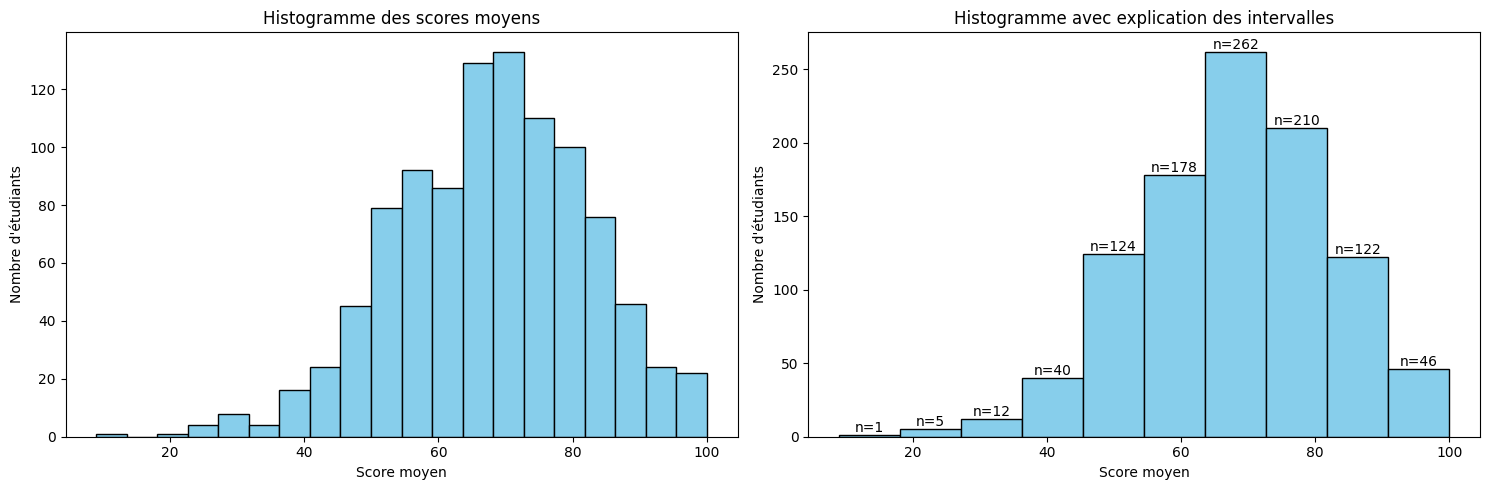


Explication de l'histogramme :
- Chaque barre repr√©sente un intervalle de scores
- La hauteur de chaque barre indique combien d'√©tudiants ont un score dans cet intervalle

Par exemple :
Entre 9.0 et 18.1 points : 1 √©tudiants
Entre 18.1 et 27.2 points : 5 √©tudiants
Entre 27.2 et 36.3 points : 12 √©tudiants
Entre 36.3 et 45.4 points : 40 √©tudiants
Entre 45.4 et 54.5 points : 124 √©tudiants
Entre 54.5 et 63.6 points : 178 √©tudiants
Entre 63.6 et 72.7 points : 262 √©tudiants
Entre 72.7 et 81.8 points : 210 √©tudiants
Entre 81.8 et 90.9 points : 122 √©tudiants
Entre 90.9 et 100.0 points : 46 √©tudiants


In [ ]:
# Cr√©er plusieurs visualisations pour mieux comprendre l'histogramme
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogramme simple
ax1.hist(df['average_score'], bins=20, color='skyblue', edgecolor='black')
ax1.set_title('Histogramme des scores moyens')
ax1.set_xlabel('Score moyen')
ax1.set_ylabel('Nombre d\'√©tudiants')

# 2. M√™me histogramme avec explication des bins
hist, bins, _ = ax2.hist(df['average_score'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('Histogramme avec explication des intervalles')
ax2.set_xlabel('Score moyen')
ax2.set_ylabel('Nombre d\'√©tudiants')

# Ajouter des annotations pour expliquer
for i in range(len(hist)):
    center = (bins[i] + bins[i+1]) / 2
    ax2.text(center, hist[i], f'n={int(hist[i])}', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Afficher quelques statistiques pour mieux comprendre
print("\nExplication de l'histogramme :")
print(f"- Chaque barre repr√©sente un intervalle de scores")
print(f"- La hauteur de chaque barre indique combien d'√©tudiants ont un score dans cet intervalle")
print(f"\nPar exemple :")
for i in range(len(hist)):
    print(f"Entre {bins[i]:.1f} et {bins[i+1]:.1f} points : {int(hist[i])} √©tudiants")

b. Peut-on voir sur cet histogramme des valeurs ab√©rrantes?

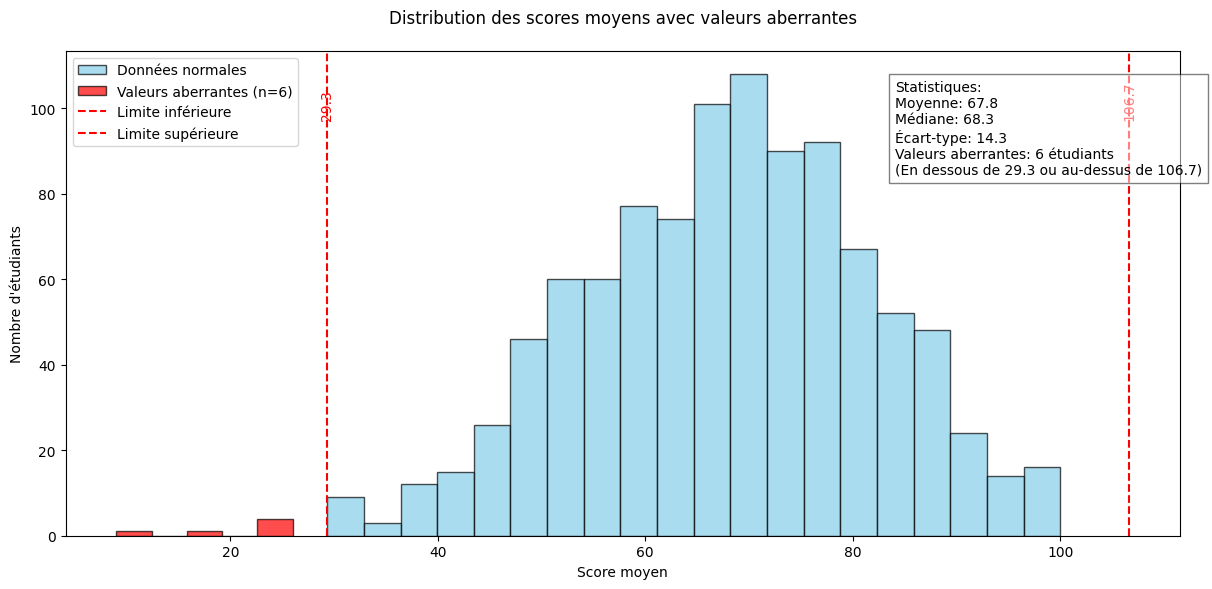

In [ ]:
# Calcul des quartiles et de l'IQR
Q1 = df['average_score'].quantile(0.25)
Q3 = df['average_score'].quantile(0.75)
IQR = Q3 - Q1

# D√©finition des seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# S√©paration des donn√©es normales et aberrantes
normal_data = df[(df['average_score'] >= lower_bound) & (df['average_score'] <= upper_bound)]['average_score']
outliers = df[(df['average_score'] < lower_bound) | (df['average_score'] > upper_bound)]['average_score']

# Cr√©ation de la figure
plt.figure(figsize=(12, 6))

# Trac√© de l'histogramme des donn√©es normales
n, bins, patches = plt.hist(normal_data, bins=20, color='skyblue', edgecolor='black', alpha=0.7, 
                           label='Donn√©es normales')

# Trac√© des valeurs aberrantes en rouge
if not outliers.empty:
    # On ajoute une barre rouge au d√©but et √† la fin de l'histogramme
    plt.hist(outliers, bins=5, color='red', edgecolor='black', alpha=0.7, 
             label=f'Valeurs aberrantes (n={len(outliers)})')
    
    # Ajout de lignes verticales pour les limites
    plt.axvline(x=lower_bound, color='r', linestyle='--', label='Limite inf√©rieure')
    plt.axvline(x=upper_bound, color='r', linestyle='--', label='Limite sup√©rieure')
    
    # Ajout d'annotations pour les valeurs limites
    plt.text(lower_bound, max(n)*0.9, f'{lower_bound:.1f}', 
             ha='center', va='bottom', color='red', rotation=90)
    plt.text(upper_bound, max(n)*0.9, f'{upper_bound:.1f}', 
             ha='center', va='bottom', color='red', rotation=90)

# Personnalisation du graphique
plt.title('Distribution des scores moyens avec valeurs aberrantes', pad=20)
plt.xlabel('Score moyen')
plt.ylabel('Nombre d\'√©tudiants')
plt.legend()

# Affichage des statistiques
stats_text = f"""Statistiques:
Moyenne: {df['average_score'].mean():.1f}
M√©diane: {df['average_score'].median():.1f}
√âcart-type: {df['average_score'].std():.1f}
Valeurs aberrantes: {len(outliers)} √©tudiants
(En dessous de {lower_bound:.1f} ou au-dessus de {upper_bound:.1f})"""

plt.figtext(0.75, 0.7, stats_text, bbox=dict(facecolor='white', alpha=0.5))
plt.tight_layout()
plt.show()

c. Faire une boxplot des moyennes par genre.

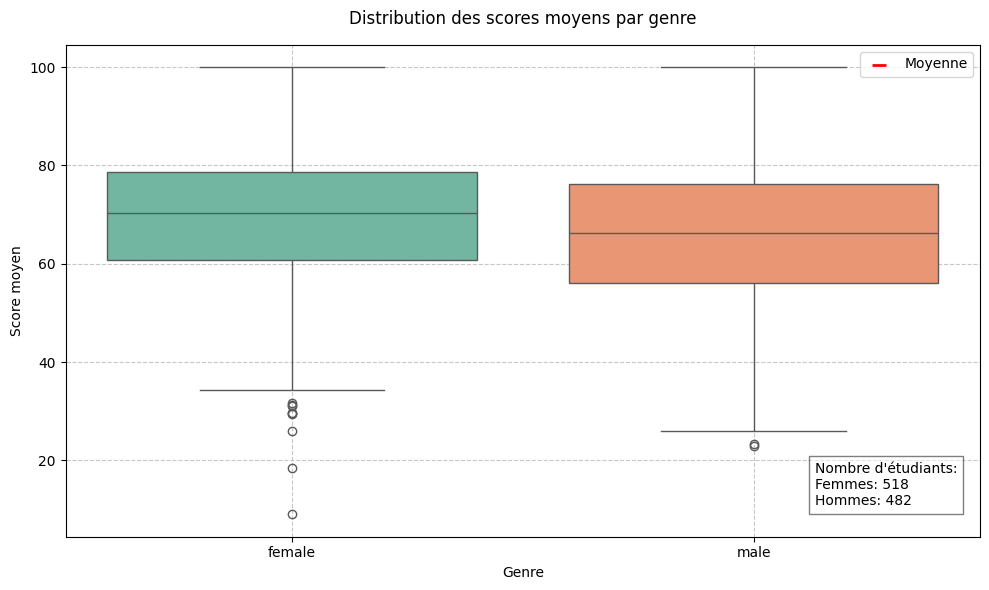

In [ ]:
plt.figure(figsize=(10, 6))

# Cr√©ation du boxplot avec seaborn
sns.boxplot(x='gender', y='average_score', hue='gender', data=df, palette='Set2')

# Personnalisation du graphique
plt.title('Distribution des scores moyens par genre', pad=15)
plt.xlabel('Genre')
plt.ylabel('Score moyen')
plt.grid(True, linestyle='--', alpha=0.7)

# Ajout de la moyenne pour chaque genre
mean_values = df.groupby('gender')['average_score'].mean()
for i, gender in enumerate(mean_values.index):
    plt.scatter(i, mean_values[gender], color='red', s=100, marker='_', linewidth=2, 
               label='Moyenne' if i == 0 else "")

# Ajout de la l√©gende
plt.legend()

# Affichage des statistiques
plt.figtext(0.82, 0.15, 
           f"Nombre d'√©tudiants:\n"
           f"Femmes: {len(df[df['gender']=='female'])}\n"
           f"Hommes: {len(df[df['gender']=='male'])}",
           bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

d. Est-ce qu'il y a une diff√©rence nette des moyennes de genre sur ce boxplot? 

=== Statistiques descriptives ===
 Genre  Effectif   Moyenne   M√©diane  √âcart-type
Femmes       518 69.569498 70.333333   14.541809
Hommes       482 65.837483 66.333333   13.698840

Test de permutation (diff√©rence des moyennes):
Diff√©rence observ√©e: 3.73
Valeur p: 0.0002

Conclusion: Il y a une diff√©rence statistiquement significative entre les moyennes (p < 0.05)
Les femmes ont en moyenne un score significativement plus √©lev√©.


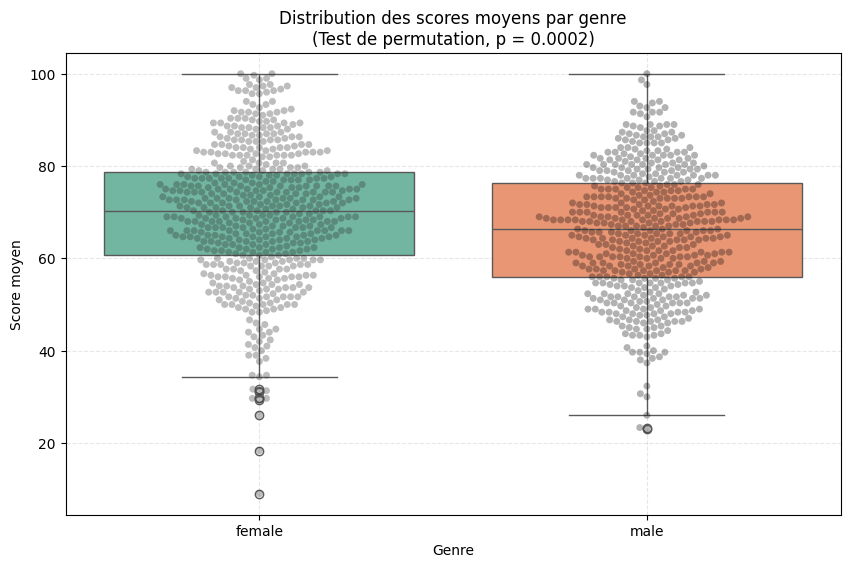

In [ ]:
import numpy as np

# S√©paration des donn√©es par genre
female_scores = df[df['gender'] == 'female']['average_score']
male_scores = df[df['gender'] == 'male']['average_score']

# Calcul des statistiques descriptives
stats = pd.DataFrame({
    'Genre': ['Femmes', 'Hommes'],
    'Effectif': [len(female_scores), len(male_scores)],
    'Moyenne': [female_scores.mean(), male_scores.mean()],
    'M√©diane': [female_scores.median(), male_scores.median()],
    '√âcart-type': [female_scores.std(), male_scores.std()]
})

print("=== Statistiques descriptives ===")
print(stats.to_string(index=False))

# Test de permutation (m√©thode non-param√©trique)
def permutation_test(x, y, n_permutations=10000):
    obs_diff = np.abs(x.mean() - y.mean())
    combined = np.concatenate([x, y])
    count = 0
    
    for _ in range(n_permutations):
        np.random.shuffle(combined)
        perm_x = combined[:len(x)]
        perm_y = combined[len(x):]
        perm_diff = np.abs(perm_x.mean() - perm_y.mean())
        if perm_diff >= obs_diff:
            count += 1
    
    return (count + 1) / (n_permutations + 1)  # +1 pour √©viter p=0

# Calcul de la p-value
p_value = permutation_test(female_scores.values, male_scores.values)

# Affichage des r√©sultats
print(f"\nTest de permutation (diff√©rence des moyennes):")
print(f"Diff√©rence observ√©e: {female_scores.mean() - male_scores.mean():.2f}")
print(f"Valeur p: {p_value:.4f}")

if p_value < 0.05:
    print("\nConclusion: Il y a une diff√©rence statistiquement significative entre les moyennes (p < 0.05)")
    if female_scores.mean() > male_scores.mean():
        print("Les femmes ont en moyenne un score significativement plus √©lev√©.")
    else:
        print("Les hommes ont en moyenne un score significativement plus √©lev√©.")
else:
    print("\nConclusion: Il n'y a pas de diff√©rence statistiquement significative entre les moyennes (p ‚â• 0.05)")

# Visualisation
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='average_score', hue='gender',data=df, palette='Set2')
sns.swarmplot(x='gender', y='average_score', hue='gender',data=df, palette='dark:black', alpha=0.3)
plt.title(f'Distribution des scores moyens par genre\n(Test de permutation, p = {p_value:.4f})')
plt.ylabel('Score moyen')
plt.xlabel('Genre')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

e. Barplot moyenne par niveau d'√©ducation des parents? Peut-on avoir des conclusions sur cette variable?

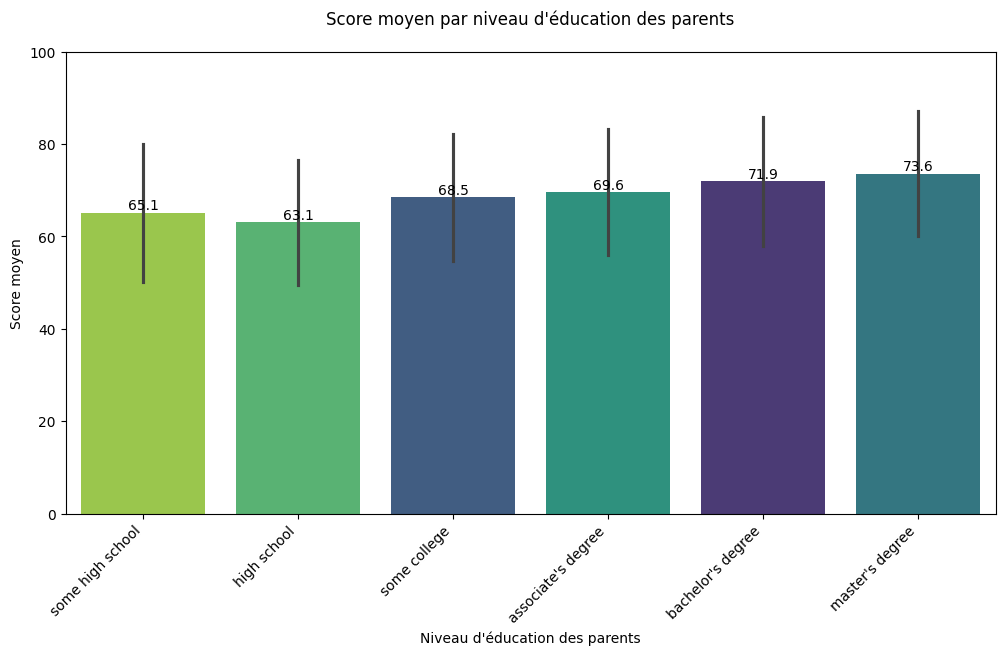

In [ ]:
# Cr√©er une copie du DataFrame pour les calculs
df_edu = df.copy()

# Trier les niveaux d'√©ducation par ordre logique
education_order = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Calculer les moyennes par niveau d'√©ducation
edu_means = df_edu.groupby('parental level of education')['average_score'].mean().sort_values()

# Cr√©er la figure
plt.figure(figsize=(12, 6))

# Barplot
ax = sns.barplot(
    x='parental level of education',
    y='average_score',
    data=df_edu,
    order=education_order,
    errorbar='sd',
    hue='parental level of education',
    palette='viridis'
)

# Personnalisation du graphique
plt.xticks(rotation=45, ha='right')
plt.title('Score moyen par niveau d\'√©ducation des parents', pad=20)
plt.xlabel('Niveau d\'√©ducation des parents')
plt.ylabel('Score moyen')
plt.ylim(0, 100)  # Pour une meilleure √©chelle

# Ajouter les valeurs sur les barres
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')


d. Faire le Heatmap de corr√©lation. Quelle est la variable la plus correl√©e avec la note moyenne?

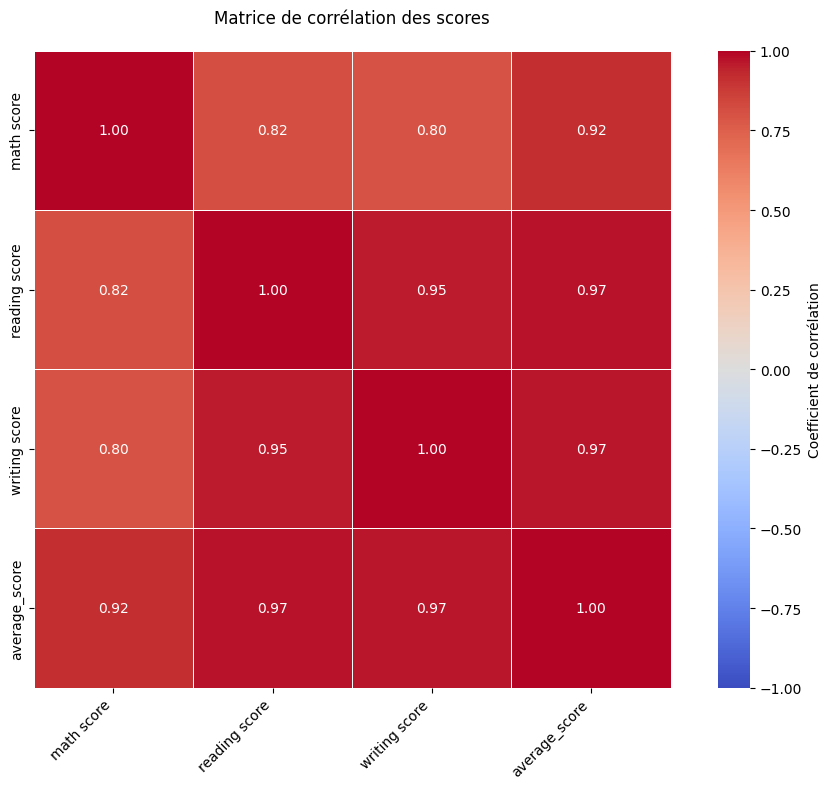

Corr√©lation avec la note moyenne (par ordre d√©croissant) :
- reading score: 0.970
- writing score: 0.966
- math score: 0.919

La variable la plus corr√©l√©e avec la note moyenne est : 'reading score' (r = 0.970)


In [ ]:
# S√©lectionner uniquement les colonnes num√©riques
numeric_cols = ['math score', 'reading score', 'writing score', 'average_score']
corr_matrix = df[numeric_cols].corr()

# Cr√©er la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Afficher les valeurs dans les cases
    cmap='coolwarm',   # D√©grad√© de couleurs
    vmin=-1, vmax=1,   # √âchelle de -1 √† 1
    square=True,       # Cases carr√©es
    fmt='.2f',         # 2 d√©cimales
    linewidths=0.5,    # √âpaisseur des lignes
    cbar_kws={'label': 'Coefficient de corr√©lation'}
)

plt.title('Matrice de corr√©lation des scores', pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

numeric_cols_with_average = ['math score', 'reading score', 'writing score']
correlations = df[numeric_cols_with_average].corrwith(df['average_score']).abs()

# Trier par ordre d√©croissant
correlations_sorted = correlations.sort_values(ascending=False)

# Afficher les r√©sultats
print("Corr√©lation avec la note moyenne (par ordre d√©croissant) :")
for variable, corr in correlations_sorted.items():
    print(f"- {variable}: {corr:.3f}")

# Afficher la variable la plus corr√©l√©e
print(f"\nLa variable la plus corr√©l√©e avec la note moyenne est : '{correlations_sorted.index[0]}' (r = {correlations_sorted.iloc[0]:.3f})")

### üîπ 4. Nettoyage des donn√©es

a. Imputation des NaN (remplacer les NaN par la moyenne de la variable correspondante)

In [ ]:
print("Valeurs manquantes avant le nettoyage :")
print(df.isnull().sum())

df_copy = df.copy()

numeric_cols = ['math score', 'reading score', 'writing score']
for col in numeric_cols:
    if df_copy[col].isnull().any():
        mean_val = df_copy[col].mean()
        df_copy[col].fillna(mean_val, inplace=True)

print("\nValeurs manquantes apr√®s le nettoyage :")
print(df_copy.isnull().sum())

Valeurs manquantes avant le nettoyage :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64

Valeurs manquantes apr√®s le nettoyage :
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
average_score                  0
dtype: int64


b. Suppression des colonnes inutiles ( Identifiez les colonnes qui sont redondantes, constantes ou sans valeur explicative[aucune corr√©lation] )

Colonnes constantes (m√™me valeur partout) : []

Colonnes avec plus de 50% de valeurs manquantes : []
Colonne redondante : writing score (fortement corr√©l√©e avec reading score)
Colonne redondante : average_score (fortement corr√©l√©e avec reading score)
Colonne redondante : average_score (fortement corr√©l√©e avec writing score)

Colonnes avec faible corr√©lation avec la cible : []

=== Rapport de nettoyage ===
Colonnes initiales : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'average_score']
Colonnes supprim√©es : ['writing score', 'average_score']
Colonnes conserv√©es : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score']

Taille initiale : (1000, 9)
Taille apr√®s nettoyage : (1000, 7)


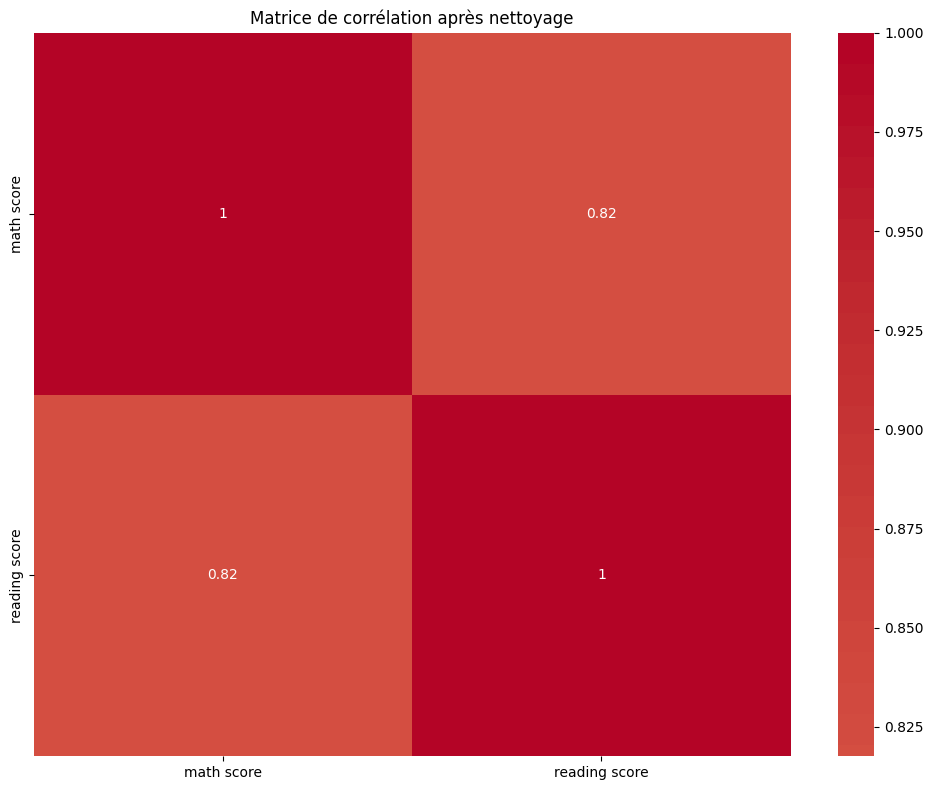

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  
0                      none          72             72  
1                 completed          69             90  
2                      none          90             95  
3                      none          47             57  
4                      none          76             78  
..                      ...         ...            ...  
995               completed          88             99  
996                    none          62             55  
997               completed          59             71  
998               completed          68             78  
999                    none          77             86  

[1000 rows x 7 columns]

In [ ]:
# 1. Cr√©er une copie du DataFrame
df_cleaned = df.copy()

# 2. Identifier les colonnes avec une seule valeur unique
constant_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("Colonnes constantes (m√™me valeur partout) :", constant_columns)

# 3. Identifier les colonnes avec un taux de valeurs manquantes √©lev√© (>50%)
missing_ratio = df_cleaned.isnull().mean()
high_missing_columns = list(missing_ratio[missing_ratio > 0.5].index)
print("\nColonnes avec plus de 50% de valeurs manquantes :", high_missing_columns)

# 4. Identifier les colonnes redondantes (forte corr√©lation)
# Calculer la matrice de corr√©lation
corr_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr().abs()

# Trouver les paires de colonnes avec une corr√©lation > 0.95
redundant_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.95:  # Seuil de corr√©lation
            colname = corr_matrix.columns[i]
            redundant_columns.add(colname)
            print(f"Colonne redondante : {colname} (fortement corr√©l√©e avec {corr_matrix.columns[j]})")

# 5. Identifier les colonnes avec peu de corr√©lation avec la cible (si applicable)
if 'average_score' in df_cleaned.columns:
    target_corr = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()['average_score'].abs()
    low_corr_columns = target_corr[target_corr < 0.1].index.tolist()
    print("\nColonnes avec faible corr√©lation avec la cible :", low_corr_columns)
else:
    low_corr_columns = []

# 6. Combiner toutes les colonnes √† supprimer
columns_to_drop = list(set(constant_columns + high_missing_columns + list(redundant_columns) + low_corr_columns))

# 7. Supprimer les colonnes inutiles
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# 8. Afficher les r√©sultats
print("\n=== Rapport de nettoyage ===")
print(f"Colonnes initiales : {df.columns.tolist()}")
print(f"Colonnes supprim√©es : {columns_to_drop}")
print(f"Colonnes conserv√©es : {df_cleaned.columns.tolist()}")
print(f"\nTaille initiale : {df.shape}")
print(f"Taille apr√®s nettoyage : {df_cleaned.shape}")

# 9. Visualisation des corr√©lations des colonnes conserv√©es
if len(df_cleaned.select_dtypes(include=['float64', 'int64']).columns) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_cleaned.select_dtypes(include=['float64', 'int64']).corr(), 
                annot=True, cmap='coolwarm', center=0)
    plt.title('Matrice de corr√©lation apr√®s nettoyage')
    plt.tight_layout()
    plt.show()

# 10. Retourner le DataFrame nettoy√©
df_cleaned

c. S√©lection des colonnes utiles

### üîπ 5. Encodage

a. Encodage de `gender` ( rendre en num√©rqieu de fa√ßon cat√©gorielle )

In [12]:
df_encoded = df.copy()

df_encoded['gender_encoded'] = df_encoded['gender'].map({'female': 0, 'male': 1})

df_encoded = df_encoded.drop(columns=['gender'])

df_encoded

race/ethnicity parental level of education         lunch  \
0          group B           bachelor's degree      standard   
1          group C                some college      standard   
2          group B             master's degree      standard   
3          group A          associate's degree  free/reduced   
4          group C                some college      standard   
..             ...                         ...           ...   
995        group E             master's degree      standard   
996        group C                 high school  free/reduced   
997        group C                 high school  free/reduced   
998        group D                some college      standard   
999        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     average_score  gender_encoded  
0        72.666667               0  
1        82.333333               0  
2        92.666667               0  
3        49.333333               1  
4        76.333333               1  
..             ...             ...  
995      94.000000               0  
996      57.333333               1  
997      65.000000               0  
998      74.333333               0  
999      83.000000               0  

[1000 rows x 9 columns]

b. Encodage one-hot de `parental_level_of_education`

In [16]:
education_dummies = pd.get_dummies(
    df['parental level of education'],
    prefix='parent_edu',  # Pr√©fixe pour les nouvelles colonnes
    drop_first=False,     # Garder toutes les colonnes
    dtype='int8'          # Utiliser int8 pour √©conomiser de l'espace
)

df_encoded = pd.concat([df, education_dummies], axis=1)

# Afficher les nouvelles colonnes
print("\nNouvelles colonnes cr√©√©es :")
print(education_dummies.columns.tolist())

print("\nV√©rification de l'encodage :")
display(df_encoded.head(10))


Nouvelles colonnes cr√©√©es :
["parent_edu_associate's degree", "parent_edu_bachelor's degree", 'parent_edu_high school', "parent_edu_master's degree", 'parent_edu_some college', 'parent_edu_some high school']

V√©rification de l'encodage :


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   
5                    none          71             83             78   
6               completed          88             95             92   
7                    none          40             43             39   
8               completed          64             64             67   
9                    none          38             60             50   

   average_score  parent_edu_associate's degree  parent_edu_bachelor's degree  \
0      72.666667                              0                             1   
1      82.333333                              0                             0   
2      92.666667                              0                             0   
3      49.333333                              1                             0   
4      76.333333                              0                             0   
5      77.333333                              1                             0   
6      91.666667                              0                             0   
7      40.666667                              0                             0   
8      65.000000                              0                             0   
9      49.333333                              0                             0   

   parent_edu_high school  parent_edu_master's degree  \
0                       0                           0   
1                       0                           0   
2                       0                           1   
3                       0                           0   
4                       0                           0   
5                       0                           0   
6                       0                           0   
7                       0                           0   
8                       1                           0   
9                       1                           0   

   parent_edu_some college  parent_edu_some high school  
0                        0                            0  
1                        1                            0  
2                        0                            0  
3                        0                            0  
4                        1                            0  
5                        0                            0  
6                        1                            0  
7                        1                            0  
8                        0                            0  
9                        0                            0

c. Est-il utilise pour l'encodage de `parental_level_of_education` de faire un Regroupement des modalit√©s ? 

### üîπ 6. Pr√©paration finale

a. Cr√©er X (features) et y (cible: average_score)

b. V√©rifier que X est bien num√©rique

c. Sauvegarder X et y

## üí° Bonus

In [ ]:
# Fonction preprocess_students_data(df)

a. Visualisation libre d'une tendance surprenante